In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
train_df = pd.read_csv("train.csv", encoding="Big5")
test_df = pd.read_csv("test.csv", encoding="Big5")

C:\Users\user\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (17,21,22) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
train_df.head()

,CUS_ID,GENDER,AGE,CHARGE_CITY_CD,CONTACT_CITY_CD,EDUCATION_CD,MARRIAGE_CD,LAST_A_CCONTACT_DT,L1YR_A_ISSUE_CNT,LAST_A_ISSUE_DT,...,L1YR_GROSS_PRE_AMT,CUST_9_SEGMENTS_CD,FINANCETOOLS_A,FINANCETOOLS_B,FINANCETOOLS_C,FINANCETOOLS_D,FINANCETOOLS_E,FINANCETOOLS_F,FINANCETOOLS_G,Y1
0,3418,M,低,A1,A1,NaN,NaN,Y,0,N,...,0.000174,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
1,4302,M,低,A1,A1,NaN,NaN,Y,0,N,...,0.008724,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
2,5545,M,低,A1,A1,1.0,0.0,Y,1,Y,...,0.005359,A,Y,N,N,N,N,N,N,N
3,7207,M,低,A1,A1,NaN,0.0,Y,0,N,...,0.000000,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
4,7213,M,低,A1,A1,1.0,0.0,N,0,N,...,0.000603,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N


In [5]:
train_df["AGE"].value_counts()

低     27213
中     27148
高     23902
中高    21737
Name: AGE, dtype: int64

In [140]:
train_df.info(max_cols=150)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 132 columns):
CUS_ID                       100000 non-null int64
GENDER                       99317 non-null object
AGE                          100000 non-null object
CHARGE_CITY_CD               100000 non-null object
CONTACT_CITY_CD              100000 non-null object
EDUCATION_CD                 79438 non-null float64
MARRIAGE_CD                  92049 non-null float64
LAST_A_CCONTACT_DT           100000 non-null object
L1YR_A_ISSUE_CNT             100000 non-null int64
LAST_A_ISSUE_DT              100000 non-null object
L1YR_B_ISSUE_CNT             100000 non-null int64
LAST_B_ISSUE_DT              100000 non-null object
CHANNEL_A_POL_CNT            100000 non-null int64
CHANNEL_B_POL_CNT            100000 non-null int64
OCCUPATION_CLASS_CD          96040 non-null float64
APC_CNT                      100000 non-null int64
INSD_CNT                     100000 non-null int64
APC_1ST_AGE  

In [15]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Columns: 131 entries, CUS_ID to FINANCETOOLS_G
dtypes: float64(30), int64(12), object(89)
memory usage: 149.9+ MB


In [14]:
train_df["Y1"].value_counts()

N    98000
Y     2000
Name: Y1, dtype: int64

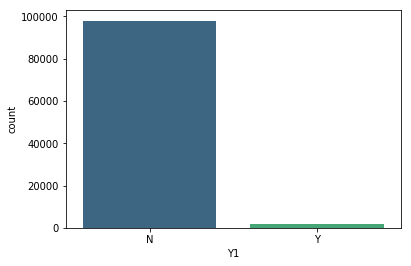

In [18]:
sns.countplot(train_df["Y1"], palette="viridis")

In [61]:
train_df["APC_CNT"].value_counts()

1    52987
0    39610
2     7099
3      294
4       10
Name: APC_CNT, dtype: int64

In [148]:
train_df["FINANCETOOLS_D"].value_counts() 

N    34308
Y     3051
Name: FINANCETOOLS_D, dtype: int64

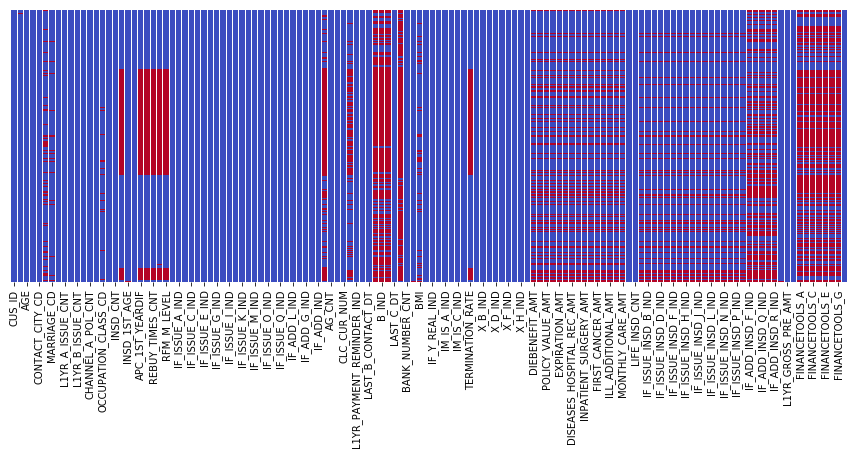

In [141]:
# Nan figure(red:Nan)
plt.figure(figsize=[15, 5])
sns.heatmap(train_df.isnull(), yticklabels=False, cbar=False, cmap='coolwarm')

In [16]:
# columns of test and train dataset are the same
sum(test_df.columns == train_df.drop("Y1", axis=1).columns) == 131

True

In [17]:
# Id are all different in test dataset and train dataset
print(test_df["CUS_ID"].value_counts().max() == test_df["CUS_ID"].value_counts().min() == 1)
print(train_df["CUS_ID"].value_counts().max() == train_df["CUS_ID"].value_counts().min() == 1)

True
True


In [13]:
a = train_df.columns[pd.isnull(train_df).sum() != 0]

In [12]:
b = test_df.columns[pd.isnull(test_df).sum() != 0]

In [14]:
# 有遺失值得欄位完全相同
a == b

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])